<h2>Assignment 1 - Linear Regression on Boston Housing Data</h2>

In [397]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

# Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
diabetes = datasets.load_diabetes()

In [53]:
# Load data from scikit-learn
print(diabetes.data.shape)
print(diabetes.target.shape)
data = diabetes.data
target = diabetes.target

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

(442, 10)
(442,)


In [487]:
def lossFunction(y, y_pred):
    return (sum((y - y_pred) ** 2) / len(y)) / 2 

<h4>Task 1: Use scikit-learn library in the following cell</h4>

In [488]:
# Task 1-1: use linear regression in sklearn
reg = linear_model.LinearRegression()
reg.fit(train_data, train_target)

# Task 1-2: show intercept and coefficents
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)


# Task 1-3: show errors on training dataset and testing dataset

scikit_train_pred = reg.predict(train_data)
scikit_test_pred = reg.predict(test_data)
print("Training error:", lossFunction(train_target, scikit_train_pred))
print("Testing error:", lossFunction(test_target, scikit_test_pred))



Intercept: [153.73654391]
Coefficients: [[  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
   24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]]
Training error: [1434.27485142]
Testing error: [1450.09681425]


<h4>Task 2: Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

In [520]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    coeff = np.linalg.inv(X.T @ X) @ X.T @ y
    return coeff
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions

def predict_linear_regression(X, coeff):
    y_pred = X @ coeff
    return y_pred


# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
coefficients = myNormalEqualFun(train_data_intercept,train_target)


# Task 2-3: show intercept and coefficents
print("Intercept:", coefficients[0])
print("Coefficients:", coefficients[1:])

# Task 2-4: show errors on training dataset and testing dataset

norm_train_pred = predict_linear_regression(train_data_intercept, coefficients)
norm_test_pred = predict_linear_regression(test_data_intercept, coefficients)
print("Training error:", lossFunction(train_target, norm_train_pred))
print("Testing error:", lossFunction(test_target, norm_test_pred))



Intercept: [153.73654391]
Coefficients: [[  1.75375799]
 [-11.51180908]
 [ 25.60712144]
 [ 16.82887167]
 [-44.44885564]
 [ 24.64095356]
 [  7.67697768]
 [ 13.1387839 ]
 [ 35.16119521]
 [  2.35136365]]
Training error: [1434.27485142]
Testing error: [1450.09681425]


<h4>Task 3: Use numerical solution (baisc gradient descent) to perform linear regression in the following cell</h4>

Intercept:  [153.73654391]
Coefficients:  [[  1.71496015]
 [-11.52675362]
 [ 25.47002703]
 [ 16.87299084]
 [-51.57203841]
 [ 30.21286739]
 [ 10.81945126]
 [ 14.11707812]
 [ 37.89468382]
 [  2.29978364]]
Training error: [1434.73700568]
Testing error: [1453.3664068]


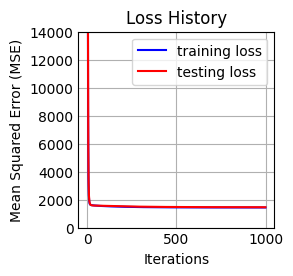

In [650]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Additional inputs: testing data and test target to calculate error of model on testing data per iteration
# Output: the final Weights
#         the loss history along iterations
# Additional output:
#         the testing loss history along iterations
def myGradientDescentFun(X,y,learning_rate,numItrs, test_data, test_target):
    m = 11
    # Initializing random weights
    weights = np.random.uniform(-1_000, 1_000, size=(m, 1))

    trainLossHistory = []
    testLossHistory = []

    for i in range(numItrs):
        # Predict y based on current weights
        y_pred = X @ weights

        # Calculate gradient using formuala

        gradient = (X.T @ (y - y_pred)) / m

        # Update weights using gradient calculated and learning rate

        weights = weights + (learning_rate * gradient)


        # Calculate MSE to append to loss history for current iteration
        trainPred = myPredictFun(X, weights)
        trainLoss = lossFunction(y, trainPred)
        testPred = myPredictFun(test_data_intercept, weights)
        testLoss = lossFunction(test_target, testPred)
        trainLossHistory.append(trainLoss)
        testLossHistory.append(testLoss)

    return weights, trainLossHistory, testLossHistory

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    y_pred = X @ w
    return y_pred

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, loss, testLoss = myGradientDescentFun(train_data_intercept,train_target,.01,1000, test_data, test_target)

# Task 3-3: show intercept and coefficents

print("Intercept: ", w[0])
print("Coefficients: ", w[1:])

# Task 3-4: show errors on training dataset and testing dataset
grad_train_pred = myPredictFun(train_data_intercept, w)
grad_test_pred = myPredictFun(test_data_intercept, w)
print("Training error:", lossFunction(train_target, grad_train_pred))
print("Testing error:", lossFunction(test_target, grad_test_pred))

# Task 3-5: plot learning curves showing training errors and testing errors along iterations

plt.plot(np.arange(len(loss)), loss, label = 'training loss', color = 'b')
plt.plot(np.arange(len(testLoss)), testLoss, label = 'testing loss', color = 'r')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Loss History')
plt.ylim(0,14000)
plt.legend()
plt.show()


<h4> (Optional) Task 4: Use numerical solution (stochastic gradient descent) to perform linear regression in the following cell</h4>

### Note that if you don't plan to work on Task 4, please delete the following cell. 

Intercepts:  [153.87194827]
Coefficients: [[  2.56430006]
 [-11.34353569]
 [ 27.7474168 ]
 [ 16.49939035]
 [ 72.06862331]
 [-67.00075455]
 [-44.40326067]
 [ -2.19234818]
 [ -9.67814385]
 [  3.40516454]]
Training error: [1434.73700568]
Testing error: [1453.3664068]


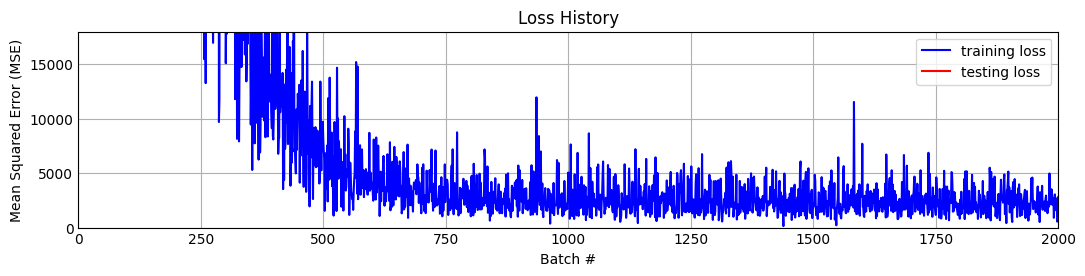

In [656]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 4-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of epoches, batch size
# Additional inputs: testing data and test target to calculate error of model on testing data per iteration
# Output: the final Weights
#         the training loss history along batches
# Additional output: 
#         the testing loss history for testing data along batches
def myGradientDescentFun(X,y,learning_rate, epoches, batchsize, test_data, test_target):
    m = 11
    weights = np.random.uniform(-1_000, 1_000, size=(m, 1))

    trainLossHistory = []
    testLossHistory = []

    test_data_intercept = np.insert(test_data, 0, 1, axis=1)

    num_samples = len(y)

    for epochs in range(num_samples):
        
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, num_samples, batchsize):
            X_batch = X_shuffled[i:i + batchsize]
            y_batch = y_shuffled[i:i + batchsize]

            y_pred = X_batch @ weights
            trainLoss = lossFunction(y_batch, y_pred)
            trainLossHistory.append(trainLoss)

            gradient = X_batch.T @ (y_batch - y_pred) / len(y_batch)

            weights += learning_rate * gradient


    return weights, trainLossHistory, testLossHistory

# Task 4-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    y_pred = X @ w
    return y_pred

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, trainLoss, testLoss = myGradientDescentFun(train_data_intercept,train_target,0.01,10,10, test_data, test_target)

# Task 4-3: show intercept and coefficents

print("Intercepts: ", w[0])
print("Coefficients:", w[1:])

# Task 4-4: show errors on training dataset and testing dataset

stoc_train_pred = myPredictFun(train_data_intercept, w)
stoc_test_pred = myPredictFun(test_data_intercept, w)
print("Training error:", lossFunction(train_target, grad_train_pred))
print("Testing error:", lossFunction(test_target, grad_test_pred))

# Task 4-5: plot learning curves showing training errors and testing errors along batches

plt.figure(figsize=(10, 2))
plt.plot(np.arange(len(trainLoss)), trainLoss, label = 'training loss', color = 'b')
plt.plot(np.arange(len(testLoss)), testLoss, label = 'testing loss', color = 'r')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Batch #')
plt.title('Loss History')
plt.ylim(0,18000)
plt.xlim(0,2000)
plt.legend()
plt.show()

